In [1]:
# Cargamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargamos la data
data = pd.read_csv("./data/train.csv")

In [3]:
# Vemos el dataframe
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# EDA
print("Dimensiones del dataset:", data.shape)
print("\nResumen estadístico:")
print(data.describe())
print("\nInformación de las variables:")
print(data.info())
print("\nValores nulos por variable:")
print(data.isnull().sum())

Dimensiones del dataset: (1460, 81)

Resumen estadístico:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.11279

/Users/erwinminor/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


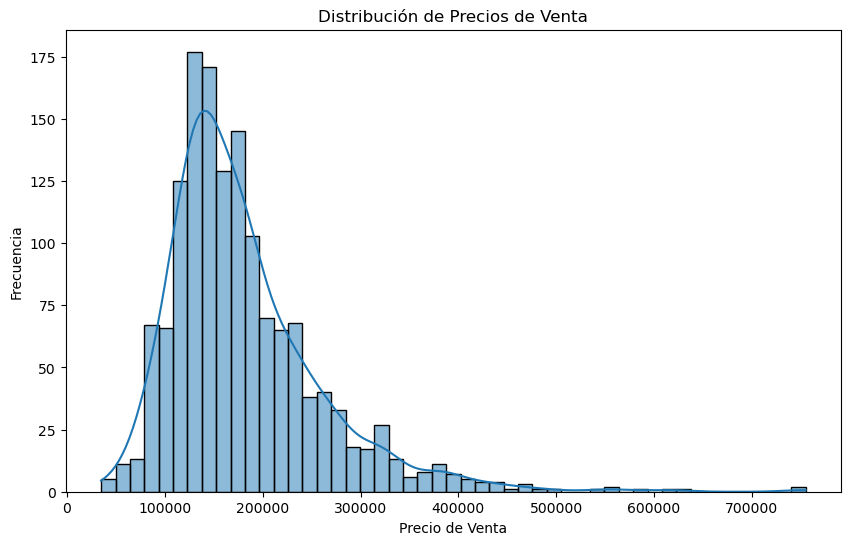

In [5]:
# Visualización de la distribución de la variable objetivo 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Venta')
plt.show()

In [6]:
# Selección de variables numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación para las características numéricas
corr_matrix = numeric_data.corr()

# Seleccionar las características más correlacionadas con 'SalePrice'
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print("\nVariables más correlacionadas con 'SalePrice':", top_corr_features)


Variables más correlacionadas con 'SalePrice': SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


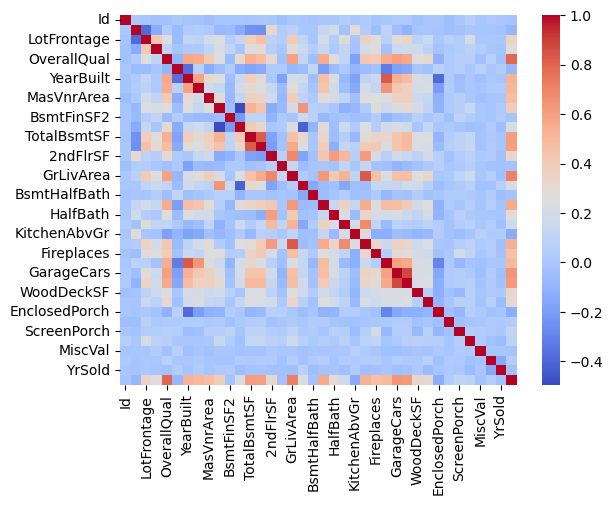

In [7]:
# Mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [8]:
# Análisis de variables categóricas
categorical_features = data.select_dtypes(include = ['object']).columns
unique_categories = data[categorical_features].nunique()
print('Features categories: ', unique_categories)

Features categories:  MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


In [9]:
# Codificar variables categóricas utilizando one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

In [10]:
# Manejo de valores faltantes
imputer = SimpleImputer(strategy='mean')
numeric_vars = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_encoded[numeric_vars] = imputer.fit_transform(data[numeric_vars])

In [11]:
# Transformación de variables
skewed_vars = ['LotFrontage', 'LotArea', 'MasVnrArea']
for var in skewed_vars:
    data_encoded[var] = np.log1p(data_encoded[var])

In [12]:
# Creación de nuevas variables
data_encoded['TotalArea'] = data_encoded['GrLivArea'] + data_encoded['TotalBsmtSF'] + data['GarageArea']
data_encoded['HouseAge'] = data_encoded['YrSold'] - data_encoded['YearBuilt']
data_encoded['TotalSF'] = data_encoded['TotalBsmtSF'] + data_encoded['1stFlrSF'] + data['2ndFlrSF']
data_encoded['TotalBathrooms'] = data_encoded['FullBath'] + 0.5 * data_encoded['HalfBath']

In [13]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Modelo y el espacio de búsqueda de hiperparámetros
model = RandomForestRegressor()
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, 20, 30],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}


In [22]:
# Pedicciones en el conjunto de prueba
y_pred = random_search.predict(X_test)

In [23]:
# Error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Error relativo
mean_saleprice = y.mean()
relative_error = rmse / mean_saleprice
print("Relative Error (based on RMSE):", relative_error)

Mean Squared Error: 890351517.6784691
Root Mean Squared Error: 29838.758648416813
Relative Error (based on RMSE): 0.16492682629895386
